## 계절성 모델 (Seasonal ARIMA)
일반적인 ARIMA 모델은 자기회귀(AR), 차분(Difference), 이동평균(MA) 성분으로 구성되어 시계열의 비정상성을 보정한다. 하지만 계절성이 있는 데이터에서는 추가적으로 계절성 성분을 고려해야 한다.<br>
계절성에 대한 자기회귀(Seasonal AR), 계절성 차분(Seasonal Difference), 계절성 이동평균(Seasonal MA)성분을 추가적으로 모델에 포함시킴<br>
Seasonal ARIMA 모델은 (p, d, q)와 (P, D, Q, S)는 계절성 성분에 대한 ARIMA 모델의 매개변수이다. S는 계절성 주기를 나타낸다.

               Value
2022-01-31  1.764052
2022-02-28  0.400157
2022-03-31  0.978738
2022-04-30  2.240893
2022-05-31  1.867558
...              ...
2029-12-31  0.706573
2030-01-31  0.010500
2030-02-28  1.785870
2030-03-31  0.126912
2030-04-30  0.401989

[100 rows x 1 columns]


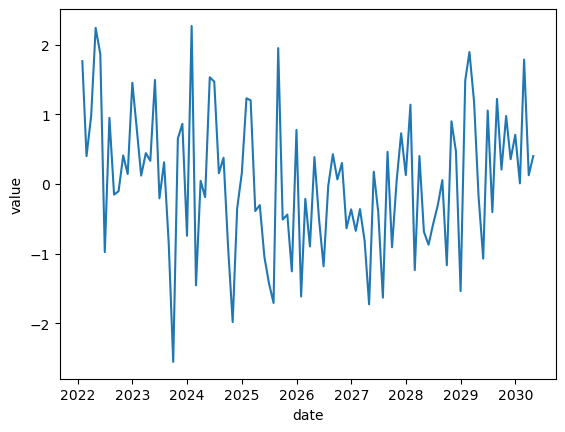

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# 시계열 데이터 생성
np.random.seed(0)
n = 100 # 데이터 포인트 수
data = np.random.normal(0, 1, n)  # 랜덤 시계열 데이터 생성
dates = pd.date_range(start = '2022-01-01', periods=n, freq='M')

# 데이터프레임 생성
df = pd.DataFrame({'Value' : data}, index=dates)
print(df)

# 데이터 확인
plt.plot(df)
plt.xlabel('date')
plt.ylabel('value')
plt.show()

x축은 날짜(월), y축은 값(Value)

In [4]:
# Seasonal ARIMA 모델 적합 및 예측
model = SARIMAX(df, ordr = (1,1,1), seasonal_order = (1,1,1,12))
results=model.fit()

print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Value   No. Observations:                  100
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -135.802
Date:                              Mon, 05 Jun 2023   AIC                            279.605
Time:                                      01:59:46   BIC                            289.514
Sample:                                  01-31-2022   HQIC                           283.597
                                       - 04-30-2030                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0535      0.118      0.452      0.651      -0.179       0.286
ar.S.L12       0.23